In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/evolution-of-humans-datasets-for-clasification/Evolution_DataSets.csv


## Import librarires

In [2]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## Export Data from csv

In [3]:
df = pd.read_csv('/kaggle/input/evolution-of-humans-datasets-for-clasification/Evolution_DataSets.csv')
df.head(10)

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light
5,Homo Rodhesiensis,0.679447,Africa,oriental,Ethiopia,savannah,1155.28124,144.77589,big,U shape,...,modern,manipulate with precision,walk,omnivore,medium-high,slim,yes,mixed,no,robust
6,Australopithecus Afarensis,3.788978,Africa,oriental,Kenya,mixed,305.31366,138.47796,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
7,hominino Sahelanthropus tchadensis,7.551967,Africa,central,Republic of Chad,mixed,258.04823,91.23118,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
8,Homo Neanderthalensis\n,0.547326,Europa,central,Germany,cold forest,1156.08025,158.10385,big,modern,...,modern,manipulate with precision,walk,carnivorous,medium-high,very modern,modern,very modern,no,robust
9,Australopithecus Anamensis,4.180914,Africa,oriental,Kenya,forest-gallery,460.06068,117.35674,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light


## encoding

In [4]:
LabelEncoder
le = LabelEncoder()

#  LabelEncoder 
df['Genus_&_Specie'] = le.fit_transform(df['Genus_&_Specie'])
df['Location'] = le.fit_transform(df['Location'])
df['Diet'] = le.fit_transform(df['Diet'])
df

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,22,6.041124,0,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,1,high,wide,no,old,no,light
1,21,4.383910,0,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,4,medium-high,wide,no,old,no,light
2,0,3.749413,0,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,1,high,slim,no,old,no,refined
3,2,4.595606,0,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,1,high,wide,no,mixed,no,light
4,1,3.614060,0,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,1,high,wide,yes,old,no,light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,3.354085,0,south,South Africa,forest-gallery,676.92547,112.88961,small,conical,...,yes,climbing,climbing,1,high,wide,yes,old,no,light
11996,1,3.969730,0,south,South Africa,forest-gallery,560.41705,105.13137,small,conical,...,yes,climbing,climbing,1,high,wide,yes,old,no,light
11997,9,0.213857,1,oriental,Indonesia,peninsular,222.91130,95.29501,small,U shape,...,modern,climbing,walk,3,medium-high,wide,no,mixed,no,light
11998,18,2.859186,0,oriental,Kenya,forest-savanna,466.86762,101.01866,megadony,V shape,...,yes,climbing,climbing,2,high,wide,no,old,no,robust


## Value counts of each column

In [5]:
df['Genus_&_Specie'].value_counts()

Genus_&_Specie
22    500
21    500
20    500
4     500
3     500
10    500
5     500
8     500
6     500
17    500
11    500
16    500
19    500
9     500
13    500
7     500
18    500
14    500
23    500
15    500
1     500
2     500
0     500
12    500
Name: count, dtype: int64

In [6]:
df['Location'].value_counts()

Location
0    9000
2    1500
1    1500
Name: count, dtype: int64

In [7]:
df['Diet'].value_counts()

Diet
3    4500
1    3000
2    2000
0    1500
4    1000
Name: count, dtype: int64

## Select values  X and Y

In [8]:
X = df[['Location','Diet']]
y = df['Genus_&_Specie']

## split values and testing  training

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.20)

## Bilduing the model 'KNeighborsClassifier'

In [10]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train , y_train)

KNeighborsClassifier()

## Predict the mode

In [11]:
y_pred = model.predict(X_test)
y_pred

array([ 2, 15,  5, ..., 15,  9,  2])

## check accuracy model

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.3375

## Find the best value of K(the number of neighbors)

In [13]:
# Define the range of k values to test
k_values = range(3,10,2)
test_accuracies = []

# Train the k-NN classifier with different values of k and evaluate on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    test_accuracies.append(accuracy)

# Determine the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"The best k value is: {best_k}")

The best k value is: 9


## Viualize K

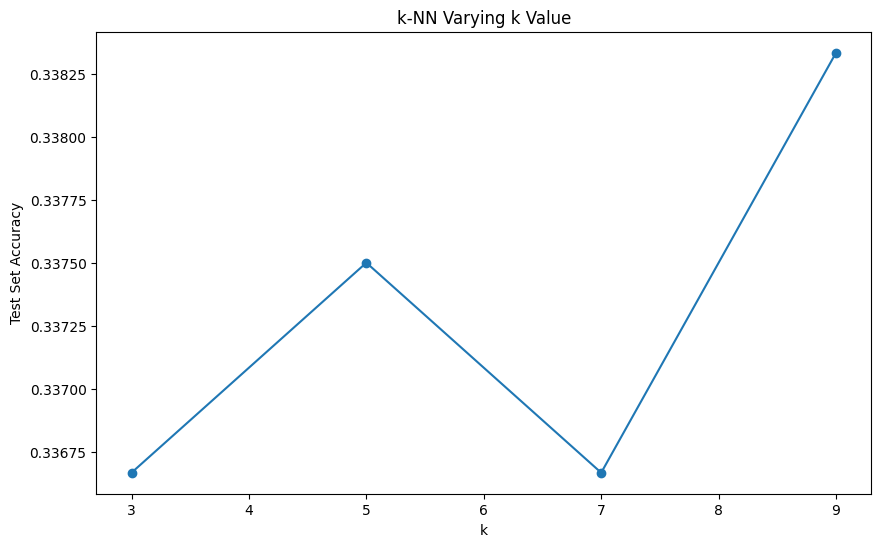

In [14]:
# Plot the k values vs. accuracy on the test set
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k Value')
plt.show()

## Bilduing the model 'DecisionTreeClassifier

In [15]:
# model DecisionTree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

## predict and accuracy

In [16]:
# predict and accuracy
y_pred = model.predict(X_test)
y_pred

array([ 1, 13,  5, ..., 13,  7,  1])

## Check accuracy model

In [17]:
accuracy_score(y_test,y_pred)

0.32208333333333333

## visualize the model

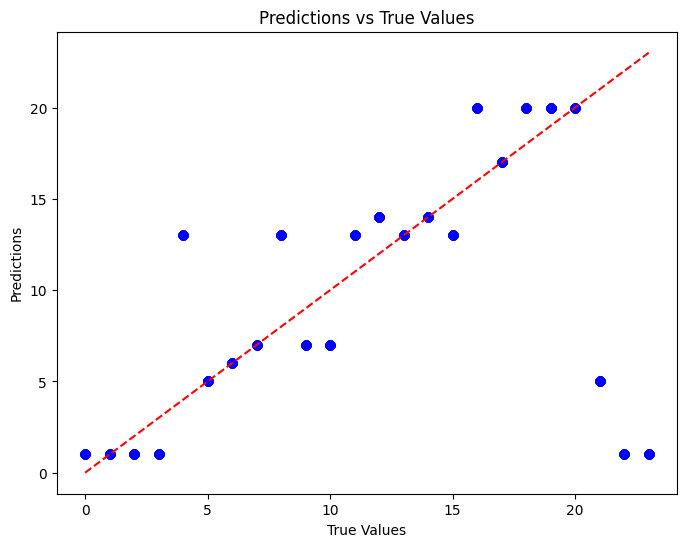

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.show()